In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
TRAIN_DATA_PATH = '../../dataset/train.csv'
TEST_DATA_PATH = '../../dataset/test.csv'
SAMPLE_SUB_PATH = '../../dataset/sample_submission.csv'
X_META_DATA_PATH = '../../dataset/meta/x_feature_info.csv'
Y_META_DATA_PATH = '../../dataset/meta/y_feature_info.csv'
SPEC_DATA_PATH = '../../dataset/meta/y_feature_spec_info.csv'


df_train = pd.read_csv(TRAIN_DATA_PATH)
df_test = pd.read_csv(TEST_DATA_PATH)
df_sample = pd.read_csv(SAMPLE_SUB_PATH)
df_x_meta = pd.read_csv(X_META_DATA_PATH)
df_y_meta = pd.read_csv(Y_META_DATA_PATH)
df_spec = pd.read_csv(SPEC_DATA_PATH)

In [3]:
def create_anomaly_cols(df, df_spec):
    df_y = df[df_spec['Feature'].values]        # get y cols
    cols_idx = [i for i in range(len(df_y))]

    for i in range(len(df_spec)):
        new_cols = []
        cols_name, y_min, y_max = df_spec.iloc[i]
        check_col = df[cols_name]

        for j in cols_idx:
            if y_min <= check_col[j] <= y_max:
                new_cols.append(j)

        
        cols_idx = new_cols

    new_df = df.copy()
    new_df['label'] = 0
    new_df['label'][cols_idx] = 1
    
    return new_df

def create_separte_anomaly_cols(df, df_spec):
    df_y = df[df_spec['Feature'].values]        # get y cols
    new_df = df.copy()

    for i in range(len(df_spec)):
        cols_idx = [idx for idx in range(len(df_y))]
        new_cols = []

        cols_name, y_min, y_max = df_spec.iloc[i]
        check_col = df[cols_name]

        for j in cols_idx:
            if y_min <= check_col[j] <= y_max:
                new_cols.append(j)

        new_col_name = f"Y_{str(i+1).zfill(2)}_defeated"
        new_df[new_col_name] = 0
        new_df[new_col_name][new_cols] = 1
    
    return new_df

new_df = create_separte_anomaly_cols(df_train, df_spec)
new_df = create_anomaly_cols(new_df, df_spec)
# save
# new_df.to_csv("../../dataset/anomaly_cols_train.csv")

/tmp/ipykernel_2564297/1842319652.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[new_col_name][new_cols] = 1
/tmp/ipykernel_2564297/1842319652.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[new_col_name][new_cols] = 1
/tmp/ipykernel_2564297/1842319652.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[new_col_name][new_cols] = 1
/tmp/ipykernel_2564297/1842319652.py:40: SettingWithCopyWarning: 
A value

In [14]:
new_df.head()
df_y = new_df[df_spec['Feature'].values]
# df_y = new_df.iloc[:, -15:]

groups = {
    'group1'    : [1, 2, 5, 6],                 # 단계별 누름량
    'group2'    : [3, 7, 10, 8, 11, 9],         # 방열재료 n의 무게, 면적
    'group3'    : [12, 13, 14, 15, 16, 17, 18], # 12: 커넥터 위치, 13: 안테나 패드위치 차이, 나머지 안테나 패드 위치
    'group4'    : [19, 20, 21, 22],             # n(1~4) 스크류 삽입 깊이   장비1
    'group5'    : [12, 24, 25, 26, 27, 28, 29], # 12: 커넥터 위치, n(1~6) 핀 치수  
    'group6'    : [30, 31, 32, 33],             # n(1~4) 스크류 삽입 깊이   장비2
    'group7'    : [34, 35, 36, 37],             # n(1~4) 스크류 체결 분당 회전수
    'group8'    : [38, 39, 40],                 # 하우징 PCB 안착부 치수
    'group9'    : [41, 42, 43, 44, 45],         # n(1~4) 안테나 레이돔 치수, 마지막은 레이돔 기울기
    'group10'   : [49, 50, 51, 52, 53, 54, 55, 56]     # 실란트 본드, cal 투입 전 대기시간, RF1~7 smt 납 양
}   

In [15]:
def view_group_y_scatter(df, group_num1, group_num2):
    group_cols = [f'X_{str(x).zfill(2)}' for x in group_num]
    df_group = df[group_cols]
    df_group_y = pd.concat([df_group, df_y], axis=1)
    pd.plotting.scatter_matrix(df_group_y.loc[:, :], diagonal="kde",figsize=(20,15))
    plt.show()

/tmp/ipykernel_2564297/1681783615.py:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


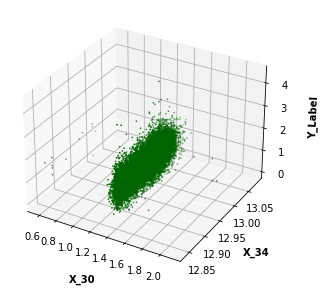

In [16]:
group_num1 = groups['group6']
group_cols1 = [f'X_{str(x).zfill(2)}' for x in group_num1]

group_num2 = groups['group7']
group_cols2 = [f'X_{str(x).zfill(2)}' for x in group_num2]

# df_group_y = pd.concat([df_group, df_y], axis=1)

g1 = df_train[group_cols1].values
g2 = df_train[group_cols2].values
y = df_y.values

fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')
ax.scatter(g1[:,0], g2[:,0], y[:, 0], marker='o', s=0.5, c='darkgreen')

ax.set_xlabel(group_cols1[0], labelpad=10.0, fontweight='bold')
ax.set_ylabel(group_cols2[0], labelpad=10.0, fontweight='bold')
ax.set_zlabel('Y_Label',labelpad=10.0, fontweight='bold')
plt.show()

In [29]:
def view_3d_scatter(df, group_num1, group_num2):
    group_cols1 = [f'X_{str(x).zfill(2)}' for x in group_num1]
    group_cols2 = [f'X_{str(x).zfill(2)}' for x in group_num2]
    df_group1 = df[group_cols1].values
    df_group2 = df[group_cols2].values
    y_group = df_y.values
    # 3x5
    fig, axrc = plt.subplots(nrows=5, ncols=3, figsize=(12, 20), subplot_kw={'projection':'3d'})

    for i, axr in enumerate(axrc):
        for j, ax in enumerate(axr):
            idx = (i)*(j+1) + j
            if idx>=14:
                break
            ax.scatter(df_group1, df_group2, y_group[:, idx], marker='o', s=0.5, c='darkgreen')
            ax.set_xlabel(group_cols1[0], labelpad=10.0, fontweight='bold')
            ax.set_ylabel(group_cols2[0], labelpad=10.0, fontweight='bold')
            ax.set_zlabel(df_y.columns.values[idx],labelpad=10.0, fontweight='bold')

    plt.show()

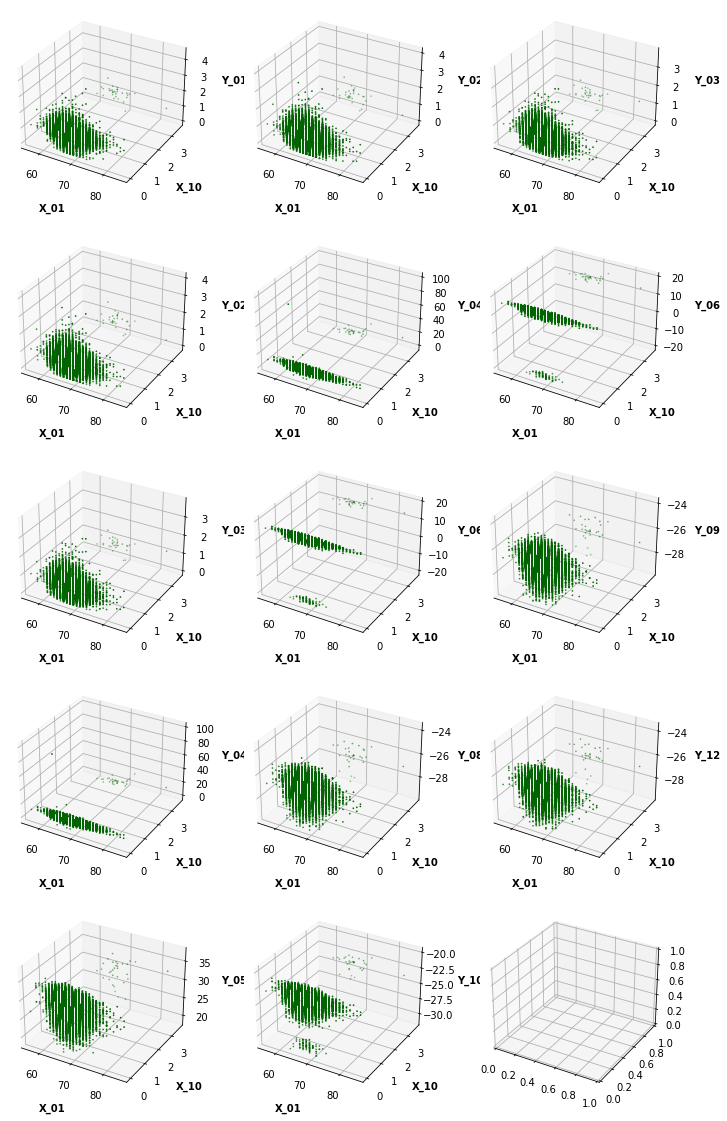

In [30]:
view_3d_scatter(new_df, [1], [10])